In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
merged_df = pd.read_csv("final_merged_data.csv")
merged_311 = pd.read_csv("merged_311.csv")

C:\Users\julis\AppData\Local\Temp\ipykernel_15744\3731311550.py:4: DtypeWarning: Columns (18,23) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("final_merged_data.csv")


## Question 1

In [ ]:
# Count the number of violations for each owner
owner_counts = merged_df['owner'].value_counts()

# Group the DataFrame by 'owner' and count the unique 'location' values
building_counts = merged_df.groupby('owner')['BUILDING_ID'].nunique()

# Combine the two series into a DataFrame for display
combined_counts = pd.concat([owner_counts, building_counts], axis=1)
combined_counts.columns = ['Violation Count', 'Building Count']

print(combined_counts)

# Calculate the violation count per building
combined_counts['Violations per Building'] = combined_counts['Violation Count'] / combined_counts['Building Count']
# Sort the DataFrame by 'Violation Count' in descending order and take the top 10
top_10_counts = combined_counts.nlargest(10, 'Violation Count')

                         Violation Count  Building Count
GBM PORTFOLIO OWNER LLC             1262              18
CITY OF BOSTON                       292              83
SELMASSON HOLDINGS LLC               249              11
18-20 OXFORD STREET LLC              232               6
IHGST PROPERTIES LLC                 225               4
...                                  ...             ...
RAHMAN LINDA                           1               1
283 OLD COLONY LLC                     1               1
DO KENNY                               1               1
WOLFF DAVID G VITALE                   1               1
SPINNEY ELIZABETH R                    1               1

[19712 rows x 2 columns]


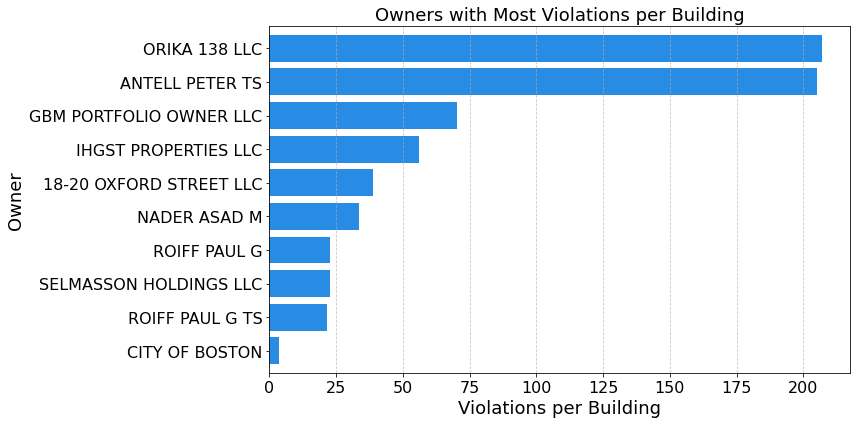

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
bars = top_10_counts['Violations per Building'].sort_values().plot(kind='barh', color='#288BE4', width=0.8)  # Sorting for better visualization
plt.title('Owners with Most Violations per Building', fontsize=18)
plt.xlabel('Violations per Building', fontsize=18)
plt.ylabel('Owner', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the total number of violations per owner
violation_counts = merged_df['owner'].value_counts().reset_index()
violation_counts.columns = ['owner', 'violation_count']

bins = [0, 100, 200, np.inf]
labels = ['<100', '100-200', '201+']
# Categorize the owners by their total violation counts
violation_counts['violation_range'] = pd.cut(violation_counts['violation_count'], bins=bins, labels=labels, right=True)

# Calculate the number and percentage of owners in each group
grouped = violation_counts['violation_range'].value_counts().reset_index()
grouped.columns = ['violation_range', 'number_of_owners']
grouped['percentage'] = (grouped['number_of_owners'] / violation_counts['owner'].nunique()) * 100
print(grouped)

  violation_range  number_of_owners  percentage
0            <100             19652   99.695617
1         100-200                50    0.253653
2            201+                10    0.050731


In [ ]:
filtered_df = merged_df[merged_df['owner'] == 'ANTELL PETER TS']
filtered_df['location'] = filtered_df['X'].astype(str) + ', ' + filtered_df['Y'].astype(str)
unique_locations = filtered_df['location'].unique()
print(unique_locations)

['-71.0770006, 42.35080867']


C:\Users\julis\AppData\Local\Temp\ipykernel_18024\3378483354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['location'] = filtered_df['X'].astype(str) + ', ' + filtered_df['Y'].astype(str)


## Question 2

C:\Users\julis\AppData\Local\Temp\ipykernel_14196\3722487724.py:6: DtypeWarning: Columns (18,23) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("final_merged_data.csv")


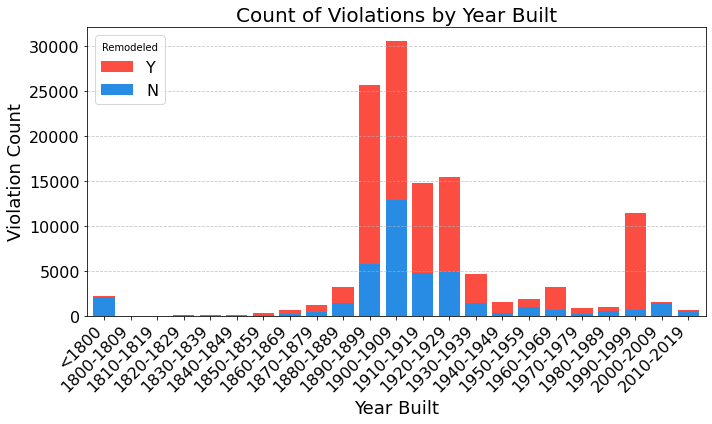

In [ ]:
merged_df = pd.read_csv("final_merged_data.csv")

# Create 'REMODELED' column based on 'YR_REMODEL'
merged_df['REMODELED'] = np.where(merged_df['YR_REMODEL'] > 1500, 'Y', 'N')

# Define bins
bins = [0] + list(range(1800, merged_df['YR_BUILT'].max() + 11, 10))
labels = ['<1800'] + [f"{i}-{i+9}" for i in range(1800, merged_df['YR_BUILT'].max(), 10)]
merged_df['Year Group'] = pd.cut(merged_df['YR_BUILT'], bins=bins, labels=labels, right=False)
violation_counts = merged_df.groupby(['Year Group', 'REMODELED']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
violation_counts.plot(kind='bar', stacked=True, color=['#288BE4', '#FB4D42'], edgecolor='none', width=0.8, ax=ax)
ax.set_title('Count of Violations by Year Built', fontsize=20)
ax.set_xlabel('Year Built', fontsize=18)
ax.set_ylabel('Violation Count', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis ticks
y_ticks = np.arange(0, 30001, 5000)
ax.set_yticks(y_ticks)
ax.set_yticklabels([str(i) for i in y_ticks], fontsize=16)

# Add legend with reversed order and title, move legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Remodeled', loc='upper left', fontsize=16)

plt.tight_layout()
plt.show()

C:\Users\julis\AppData\Local\Temp\ipykernel_14196\3325417582.py:2: DtypeWarning: Columns (18,23) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("final_merged_data.csv")


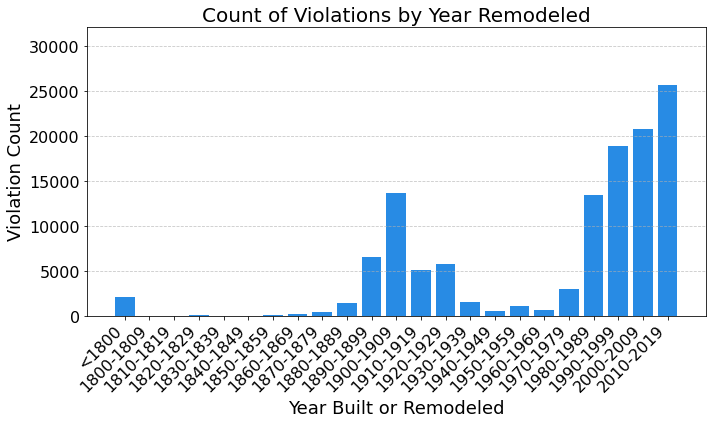

In [ ]:
merged_df = pd.read_csv("final_merged_data.csv")
# Create 'REMODELED' column based on 'YR_REMODEL'
merged_df['REMODELED'] = np.where(merged_df['YR_REMODEL'] > 1970, 'Y', 'N')

# Create a new column to store the appropriate year value
merged_df['Year'] = np.where(merged_df['YR_REMODEL'] > 1970, merged_df['YR_REMODEL'], merged_df['YR_BUILT'])

# Define bins
bins = [0] + list(range(1800, merged_df['Year'].max() + 11, 10))
labels = ['<1800'] + [f"{i}-{i+9}" for i in range(1800, merged_df['Year'].max(), 10)]

# Group by bins and count violations
merged_df['Year Group'] = pd.cut(merged_df['Year'], bins=bins, labels=labels, right=False)
violation_counts = merged_df.groupby('Year Group').size()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(violation_counts.index, violation_counts, color='#288BE4', edgecolor='none')
plt.title('Count of Violations by Year Remodeled', fontsize=20)
plt.xlabel('Year Built or Remodeled', fontsize=18)
plt.ylabel('Violation Count', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)


# Find the maximum y-value from both graphs
max_y_value = max(violation_counts.max(), ax.get_ylim()[1])
plt.ylim(0, max_y_value)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
# Calculate percentages
cond_percentages = merged_df['OVERALL_COND'].value_counts(normalize=True) * 100
cond_df = pd.DataFrame(cond_percentages)
cond_df.columns = ['Percentage']

# Reset index to have the condition values as a column
cond_df.reset_index(inplace=True)
cond_df.columns = ['OVERALL_COND', 'Percentage']
print(cond_df)

  OVERALL_COND  Percentage
0            A   80.986846
1            G   15.713103
2            F    2.141335
3            P    0.611055
4            E    0.547661


## Question 4
### Building Violations

In [ ]:
# Get the value counts of complaint codes
common_complaints = merged_df['code'].value_counts()
print("Most common types of building complaints based on the 'code' column:")
print(common_complaints.head(10))

C:\Users\julis\AppData\Local\Temp\ipykernel_15744\2366318429.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_v['year'] = merged_df_v['year'].astype(int)
C:\Users\julis\AppData\Local\Temp\ipykernel_15744\2366318429.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_v['short_code'] = merged_df_v['code'].astype(str).str.split('.').str[0]
C:\Users\julis\AppData\Local\Temp\ipykernel_15744\2366318429.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

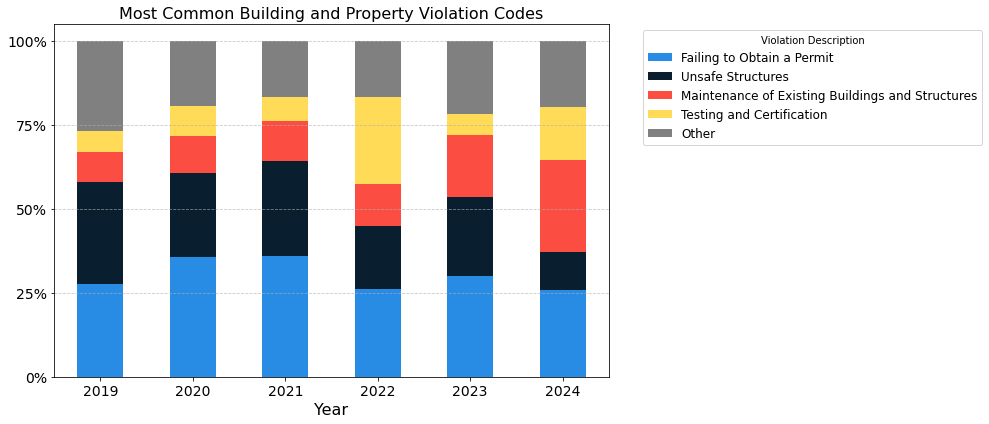

In [ ]:
# Filter the DataFrame for cases starting with "V"
merged_df_v = merged_df[merged_df['case_no'].str.startswith('V')]

# Ensure 'year' column exists and is of type int
merged_df_v['year'] = merged_df_v['year'].astype(int)
merged_df_v['short_code'] = merged_df_v['code'].astype(str).str.split('.').str[0]

# Get the top 4 most common short codes across all years
top_4_short_codes_v = merged_df_v['short_code'].value_counts().head(4).index
merged_df_v['short_code_grouped'] = merged_df_v['short_code'].apply(lambda x: x if x in top_4_short_codes_v else 'Other')
violation_counts_by_year_v = merged_df_v.groupby(['year', 'short_code_grouped']).size().reset_index(name='violation_count')

# Calculate the total count of violations for each year
total_violations_by_year = violation_counts_by_year_v.groupby('year')['violation_count'].sum()
violation_counts_by_year_v = violation_counts_by_year_v.merge(total_violations_by_year, on='year', suffixes=('_individual', '_total'))
# Calculate proportions
violation_counts_by_year_v['violation_proportion'] = violation_counts_by_year_v['violation_count_individual'] / violation_counts_by_year_v['violation_count_total']

pivot_table_v = violation_counts_by_year_v.pivot(index='year', columns='short_code_grouped', values='violation_proportion').fillna(0)
pivot_table_v = pivot_table_v[top_4_short_codes_v.tolist() + ['Other']]

# Custom violation descriptions
violation_descriptions = {
    top_4_short_codes_v[0]: 'Failing to Obtain a Permit',
    top_4_short_codes_v[1]: 'Unsafe Structures',
    top_4_short_codes_v[2]: 'Maintenance of Existing Buildings and Structures',
    top_4_short_codes_v[3]: 'Testing and Certification',
    'Other': 'Other'
}

pivot_table_v.columns = [violation_descriptions[col] for col in pivot_table_v.columns]
custom_colors = ['#288BE4', '#091F2F', '#FB4D42', '#FFDB58', 'grey']

# Plot the stacked bar chart
ax = pivot_table_v.plot(kind='bar', stacked=True, figsize=(14, 6), color=custom_colors)
plt.xlabel('Year', fontsize=16)
plt.title('Most Common Building and Property Violation Codes', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(np.linspace(0, 1, 5), ['0%', '25%', '50%', '75%', '100%'], fontsize=14)
plt.legend(title='Violation Description', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Filter the DataFrame for cases starting with "V"
merged_df_v = merged_df[merged_df['case_no'].str.startswith('V')]

# Ensure 'year' column exists and is of type int
merged_df_v['year'] = merged_df_v['year'].astype(int)
merged_df_v['short_code'] = merged_df_v['code'].astype(str).str.split('.').str[0]

# Get the total count of violation codes for cases starting with "V"
total_count_v = merged_df_v['short_code'].count()
short_code_counts_v = merged_df_v['short_code'].value_counts()
short_code_percentages_v = (short_code_counts_v / total_count_v) * 100
short_code_stats_v = pd.DataFrame({'Count': short_code_counts_v, 'Percentage': short_code_percentages_v})

print(short_code_stats_v)

            Count  Percentage
105           611   30.128205
116           476   23.471400
102           281   13.856016
1001          253   12.475345
107            88    4.339250
...           ...         ...
143 sec 3L      1    0.049310
R104            1    0.049310
114             1    0.049310
248 CMR         1    0.049310
1029            1    0.049310

[67 rows x 2 columns]


C:\Users\julis\AppData\Local\Temp\ipykernel_14196\4032775629.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_v['year'] = merged_df_v['year'].astype(int)
C:\Users\julis\AppData\Local\Temp\ipykernel_14196\4032775629.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_v['short_code'] = merged_df_v['code'].astype(str).str.split('.').str[0]


C:\Users\julis\AppData\Local\Temp\ipykernel_15744\1780147762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_ce['year'] = merged_df_ce['year'].astype(int)
C:\Users\julis\AppData\Local\Temp\ipykernel_15744\1780147762.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_ce['short_code'] = merged_df_ce['code'].astype(str).str.split('.').str[0]
C:\Users\julis\AppData\Local\Temp\ipykernel_15744\1780147762.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

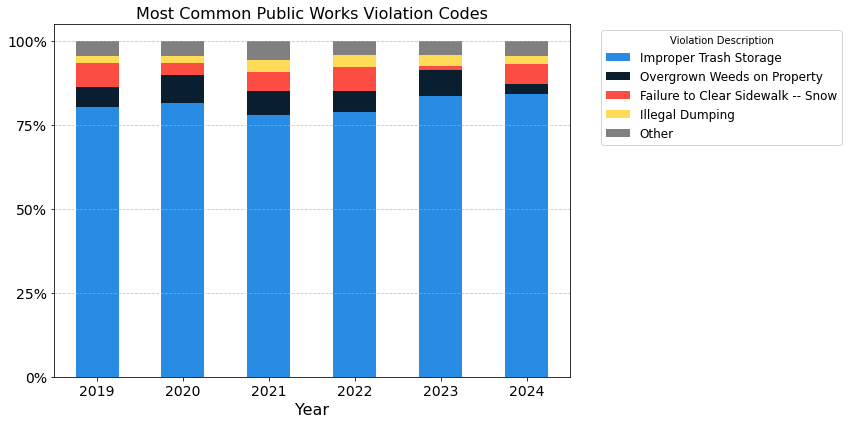

In [ ]:
# Filter the DataFrame for cases starting with "CE"
merged_df_ce = merged_df[merged_df['case_no'].str.startswith('CE')]

# Ensure 'year' column exists and is of type int
merged_df_ce['year'] = merged_df_ce['year'].astype(int)
merged_df_ce['short_code'] = merged_df_ce['code'].astype(str).str.split('.').str[0]

# Define a mapping for combining codes
code_mapping = {
    '1': 'Group 1',
    '2': 'Group 1',
    '3': 'Group 1',
    '17a': 'Group 17',
    '17b': 'Group 17',
    '17c': 'Group 17',
    '9a': 'Group 9',
    '9b': 'Group 9',
    '9c': 'Group 9'
}

merged_df_ce['short_code_grouped'] = merged_df_ce['short_code'].map(code_mapping).fillna(merged_df_ce['short_code'])

# Get the top 4 most common short codes across all years, after grouping
top_4_short_codes_ce = merged_df_ce['short_code_grouped'].value_counts().head(4).index
merged_df_ce['short_code_grouped'] = merged_df_ce['short_code_grouped'].apply(lambda x: x if x in top_4_short_codes_ce else 'Other')

# Group by 'year' and 'short_code_grouped' to get the count of each type of violation per year
violation_counts_by_year_ce = merged_df_ce.groupby(['year', 'short_code_grouped']).size().reset_index(name='violation_count')
total_violations_by_year = violation_counts_by_year_ce.groupby('year')['violation_count'].sum()
violation_counts_by_year_ce = violation_counts_by_year_ce.merge(total_violations_by_year, on='year', suffixes=('_individual', '_total'))
violation_counts_by_year_ce['violation_proportion'] = violation_counts_by_year_ce['violation_count_individual'] / violation_counts_by_year_ce['violation_count_total']

pivot_table_ce = violation_counts_by_year_ce.pivot(index='year', columns='short_code_grouped', values='violation_proportion').fillna(0)
pivot_table_ce = pivot_table_ce[top_4_short_codes_ce.tolist() + ['Other']]

# Custom violation descriptions
violation_descriptions = {
    top_4_short_codes_ce[0]: 'Improper Trash Storage',
    top_4_short_codes_ce[1]: 'Overgrown Weeds on Property',
    top_4_short_codes_ce[2]: 'Failure to Clear Sidewalk -- Snow',
    top_4_short_codes_ce[3]: 'Illegal Dumping',
    'Other': 'Other'
}

pivot_table_ce.columns = [violation_descriptions[col] for col in pivot_table_ce.columns]
custom_colors = ['#288BE4', '#091F2F', '#FB4D42', '#FFDB58', 'grey']

# Plot the stacked bar chart
ax = pivot_table_ce.plot(kind='bar', stacked=True, figsize=(12, 6), color=custom_colors)
plt.xlabel('Year', fontsize=16)
plt.title('Most Common Public Works Violation Codes', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(np.linspace(0, 1, 5), ['0%', '25%', '50%', '75%', '100%'], fontsize=14)

plt.legend(title='Violation Description', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 311 Complaints

In [ ]:
# Convert 'open_dt' to datetime
merged_311['open_dt'] = pd.to_datetime(merged_311['open_dt'], errors='coerce')

# Extract the year from 'open_dt'
merged_311['year'] = merged_311['open_dt'].dt.year

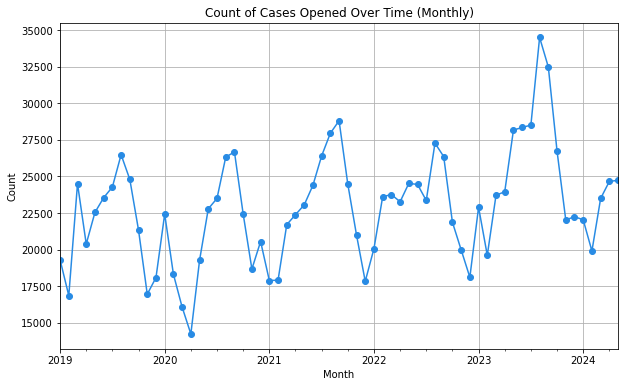

In [ ]:
# Group by month and count the number of occurrences
cases_by_month = merged_311.groupby(merged_311['open_dt'].dt.to_period('M')).size()

# Plotting
plt.figure(figsize=(10, 6))
cases_by_month.plot(kind='line', marker='o', color='#288BE4')
plt.title('Count of Cases Opened Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
filtered_311 = merged_311[merged_311['department'].isin(['ISD', 'HS_O', 'PROP'])]

In [ ]:
filtered_311.head()

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,case_title,subject,reason,type,...,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source,year
8,101002767883,2019-01-01 02:38:00,2019-01-09 03:30:00,2019-05-14 10:05:13,OVERDUE,Closed,PWD Graffiti,Public Works Department,Highway Maintenance,PWD Graffiti,...,15.0,21.0,2113.0,149 Chiswick Rd,2135.0,42.341220,-71.154151,0101000020E610000080B1E69ADDC951C0AB46DE15AD2B...,Citizens Connect App,2019
26,101002767901,2019-01-01 03:49:15,2019-03-08 03:30:00,2019-03-21 07:08:21,OVERDUE,Closed,Graffiti Removal,Property Management,Graffiti,Graffiti Removal,...,6.0,5.0,501.0,INTERSECTION Chandler St & Berkeley St,NaN,42.346972,-71.070954,0101000020E61000008F193E818AC451C038A74991692C...,Citizens Connect App,2019
44,101002767921,2019-01-01 04:36:00,2020-12-21 04:36:22,2019-01-03 03:12:13,ONTIME,Closed,Contractors Complaint,Inspectional Services,Building,Contractors Complaint,...,13.0,11.0,1103.0,247 Walnut Ave,2119.0,42.318130,-71.091281,0101000020E61000001477A18AD7C551C03B563D78B828...,Constituent Call,2019
55,101002767934,2019-01-01 05:00:48,2019-01-07 03:30:00,2019-01-01 05:13:20,ONTIME,Closed,Building Inspection Request,Inspectional Services,Building,Building Inspection Request,...,9.0,14.0,1411.0,425 Harvard St,2124.0,42.293067,-71.091683,0101000020E61000005C74FA20DEC551C0F91495348325...,Constituent Call,2019
57,101002767937,2019-01-01 05:04:00,2019-01-09 03:30:00,2019-01-03 03:19:09,ONTIME,Closed,Electrical,Inspectional Services,Building,Electrical,...,9.0,14.0,1411.0,425 Harvard St,2124.0,42.293067,-71.091683,0101000020E61000005C74FA20DEC551C0F91495348325...,Constituent Call,2019


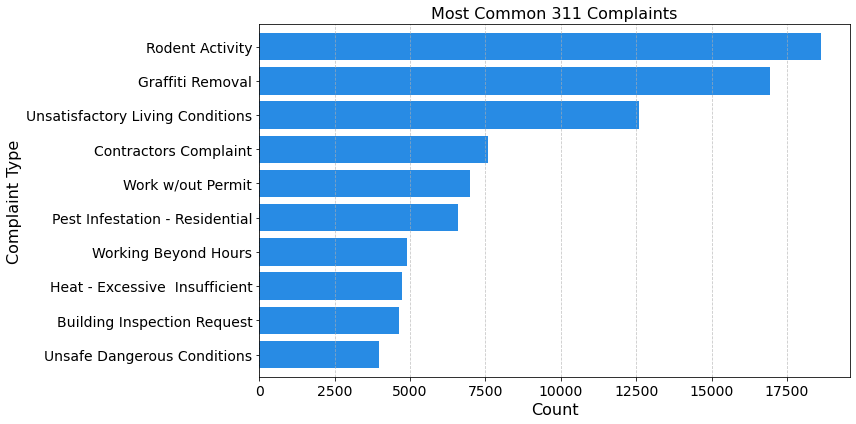

In [ ]:
# Get the top 10 most common complaint types
top_10_complaint_types = filtered_311['type'].value_counts().head(10)
top_10_complaint_types = top_10_complaint_types.sort_values()

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_10_complaint_types.plot(kind='barh', color='#288BE4', width=0.8)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Complaint Type', fontsize=16)
plt.title('Most Common 311 Complaints', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()